# Final Project

You will be asked to download data by yourselves and answer several data science questions through this final project. This project has two parts.


## Part 1 (15 Points):

This part contains 10 different data science questions that you are asked to answer. You need to download the corresponding data and write code to process the data to answer these questions. For each question, you need to provide your code to anser this question, as well as final asnwers. Each question will be worth 1.5 points in this part. 


## Final Submission:

Your final submission will contain two files:

1. The first would be this notebook. You need to provide code for your answers as well as your answers. You also need to provide visualization and executive summary using Markdown in this notebook. 

2. The second is the html version of this notebook. 


## Part 1

First, you need to download the most recent datasets containing listing and reviews in **Los Angeles** from (insidearibnb.com)[http://insideairbnb.com/get-the-data.html]. You will then need to provide the code as well as answers to the following questions.

**To make sure that you downloaded the right dataset, your solution to Question 1 should be:**
1. **Number of unique listings = 43763**
2. **Number of unique hosts = 26730**

### Question 1: How many unique listings are there in the LA dataset? How many unique hosts are there?
**Question 1 Answer:**

|unique listings|unique hosts|
|--------|-------|
|43763  |26730|

In [2]:
# You need to provide the code to answer the previous quesiton
# (you should also briefly explain your data structure -- 
# where do you put your data and how you get your data)
import pandas as pd
dfl=pd.read_csv("data/listings.csv")
dfl.id.nunique(),dfl.host_id.nunique()

(43763, 26730)

### Question 2: What is the mean, median, standard deviation, minimum and maximum of the number of listings per host in LA? (for each host, you only need to consider the listings from LA)
**Question 2 Answer:**

|question|answer|
|--------|-------|
|mean  |1.6372240927796484|
|median  |1.0|
|standard deviation  |2.4972817129321685|
|minimum  |1|
|maximum  |152|

In [8]:
dfl1=dfl
dfl1=dfl1.drop_duplicates(keep='first')                                           
dfl2=dfl1.groupby(by=['host_id'])['id'].count()
dfl2.mean(),dfl2.median(),dfl2.std(),dfl2.min(),dfl2.max()

(1.6372240927796484, 1.0, 2.4972817129321685, 1, 152)

### Question 3: What is the average and standard deviation number of listings for a super host versus a non-super host? Does super host or non-super host have more listings on average?
**Question 3 Answer:**

|super host|
|-------|
|average listings number|1.7530558308556325|
|standard deviation|1.9022805996443113|

|non-super host|
|-------|
|average listings number|1.60326297443842|
|standard deviation|2.6462886968598296|

In [7]:
dfl_nonsuper=dfl.loc[(dfl.host_is_superhost == 'f'),:]
dfl_super=dfl.loc[(dfl.host_is_superhost == 't'),:]
dfl_super_count=dfl_super.groupby(by=['host_id'])['id'].count()
dfl_nonsuper_count=dfl_nonsuper.groupby(by=['host_id'])['id'].count()
print(dfl_super_count.mean(),dfl_super_count.std())
print(dfl_nonsuper_count.mean(),dfl_nonsuper_count.std())

1.7530558308556325 1.9022805996443113
1.60326297443842 2.6462886968598296


### Question 4: What are the unique types of host verifications are there? (It doesn't matter if you include "None" or empty string as a type)
**Question 4 Answer:**

<table>
    <tr>
        <td>email</td>
        <td>phone</td>
        <td>facebook</td>
        <td>reviews</td>
    </tr>
    <tr>
        <td>kba</td>
        <td>jumio</td>
        <td>government_id</td>
        <td>offline_government_id</td>
    </tr>
    <tr>
        <td>selfie</td>
        <td>identity_manual</td>
        <td>work_email</td>
        <td>google</td>
    </tr>
    <tr>
        <td>manual_online</td>
        <td>manual_offline</td>
        <td></td>
        <td>sent_id</td>
    </tr>
    <tr>
        <td>sesame</td>
        <td>sesame_offline</td>
        <td>None</td>
        <td>photographer</td>
    </tr>
    <tr>
        <td>zhima_selfie</td>
        <td>weibo</td>
    </tr>
</table>

In [8]:
dfl5=dfl.loc[:,['host_id','host_verifications']]
dfl5=dfl5.drop_duplicates(keep='first')
host_veri_dic={}
for i in dfl5.host_verifications:
    i = i.strip('[').strip(']').replace("'","").replace(" ","").split(',')
    for j in i:
        if j in host_veri_dic.keys():
            host_veri_dic[j] += 1
        else:
            host_veri_dic[j] = 1
host_veri_dic.keys()

dict_keys(['email', 'phone', 'facebook', 'reviews', 'kba', 'jumio', 'government_id', 'offline_government_id', 'selfie', 'identity_manual', 'work_email', 'google', 'manual_online', 'manual_offline', '', 'sent_id', 'sesame', 'sesame_offline', 'None', 'photographer', 'zhima_selfie', 'weibo'])

### Question 5: What are the five most popular verification types of hosts? For each type of the top five verifications, how many percent of hosts verify that type?
**Question 5 Answer:**

|verification type|percent|
|--------|-------|
|phone|0.9937523381967827|
|email|0.9353909465020576|
|reviews|0.7422745978301534|
|government_id|0.464983164983165|
|jumio|0.45173961840628507|

In [9]:
top_five_value = sorted(host_veri_dic.values(),reverse=True)[0:5]
top_five_percent = {}
for value in top_five_value:
    for key in host_veri_dic.keys():
        if host_veri_dic[key] == value:
            top_five_percent[key] = value/dfl5['host_id'].count()
top_five_percent

{'phone': 0.9937523381967827,
 'email': 0.9353909465020576,
 'reviews': 0.7422745978301534,
 'government_id': 0.464983164983165,
 'jumio': 0.45173961840628507}

### Question 6: What is the mean, standard deviation of the average price of a listing in Los Angles from 01/01/2019 to 03/01/2019 (inclusive)? (For listings that are not available in this time, you should not count them in the average price.)

**Question 6 Answer:**

|mean|standard deviation|
|--------|-------|
|213.240917 |577.396135|

In [4]:
dfc=pd.read_csv("data/calendar.csv",parse_dates=["date"])
dfc6=dfc.loc[(dfc['date'] >= '2019-1-1') & (dfc['date'] <= '2019-3-1') & (dfc['available'] == 't'),:]
dfc6['price']=dfc6['price'].map(lambda x: float(x.strip('$').replace(",","")))
dfc6t=dfc6.groupby(by=['listing_id'])['price'].mean()
dfc6t.describe()

C:\Users\ibm\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


count    33161.000000
mean       213.240917
std        577.396135
min         10.000000
25%         70.000000
50%        112.150000
75%        195.000000
max      54837.000000
Name: price, dtype: float64

### Question 7: For reviews that are written in Jan, 2016, what are the most popular ten words except stopping words? What about reviews written in March, 2017 and April, 2018?
**Hint**: You need to use NTLK stopping words to find the stopping words in Python. You also need to remove punctuation and numbers

**Question 7 Answer:**

|Jan, 2016|
|-------|
|great|stay|place|location|clean|house|us|would|host|nice|

|March, 2017|
|-------|
|great|place|stay|location|clean|nice|host|would|house|comfortable|

|April, 2018|
|-------|
|great|place|stay|location|clean|would|host|nice|la|house|

In [15]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
stop_words = set(stopwords.words('english')) 
    
def top_ten(year,month):    
    dfr=pd.read_csv("data/reviews.csv",parse_dates = ['date'])
    dfr=dfr.loc[dfr['date'].dt.year == year].loc[dfr['date'].dt.month == month]


    from string import punctuation
    def strip_punctuation(s):
        return ''.join(c for c in s if c not in punctuation)

    def strip_numbers(s):
        numbers = ['0','1','2','3','4','5','6','7','8','9']
        return ''.join(c for c in s if c not in numbers)

    words = {}
    for comment in dfr['comments']:
        comment=str(comment)
        comment = strip_punctuation(comment)
        comment = strip_numbers(comment)
        comment=comment.replace("’","")
        word_tokens = word_tokenize(comment)     
        for w in word_tokens:
            w = w.lower()
            if w not in stop_words:
                if w in words.keys():
                    words[w] += 1
                else:
                    words[w] = 1

    top_ten_value = sorted(words.values(),reverse=True)[0:10]
    top_ten_words = {}
    for value in top_ten_value:
        for key in words.keys():
            if words[key] == value:
                top_ten_words[key] = value
    return top_ten_words.keys()
    

print(top_ten(2016,1))
print(top_ten(2017,3))
print(top_ten(2018,4))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ibm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
dict_keys(['great', 'stay', 'place', 'location', 'clean', 'house', 'us', 'would', 'host', 'nice'])
dict_keys(['great', 'place', 'stay', 'location', 'clean', 'nice', 'host', 'would', 'house', 'comfortable'])
dict_keys(['great', 'place', 'stay', 'location', 'clean', 'would', 'host', 'nice', 'la', 'house'])


### Question 8: Which five zipcode has the highest average listing price and has at least 30 listings (again only considering available dates) between 2019-01-01 to 2019-02-01 (inclusive)? What are these listing prices? What are the number of active listings and number of hosts in these top five zipcodes (a listing is active if it has at least one available date in the calendar data)?

**Question 8 Answer:**

|top 5 zipcode:|90210|91302|90265|90077|91436|
|--------|-------|--------|-------|--------|-------|
|average price|1353.793875|1348.436866|1075.390163|948.524392|682.224427|
|number of active listings|297|53|473|66|64|
|number of hosts|257|62|379|66|58|

In [5]:
dfc8 = dfc.loc[(dfc['date'] >= '2019-1-1')& (dfc['date'] <= '2019-2-1')& (dfc['available'] == 't'),:]
dfc8['price']=dfc8['price'].map(lambda x: float(x.strip('$').replace(",","")))
dfc8 = dfc8.groupby(by = ['listing_id'])['price'].mean()
dfc8 = dfc8.to_frame().reset_index()
dfl8=dfl.loc[:,['id','zipcode']].drop_duplicates(keep='first')
df8 = dfc8.merge(dfl8, how = 'left', left_on = 'listing_id', right_on = 'id')
df8 = df8.groupby(by = 'zipcode').filter(lambda x: x['id'].nunique() >= 30)
df8t = pd.DataFrame(df8.groupby(by = 'zipcode').price.mean())
df8_topfive = df8t.sort_values('price', ascending = False).head(5)
top5 = list(df8_topfive.index)
df8_topfive

C:\Users\ibm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,price
zipcode,
90210,1353.793875
91302,1348.436866
90265,1075.390163
90077,948.524392
91436,682.224427


In [6]:
df8t2 = pd.DataFrame(df8.groupby(by = 'zipcode').id.nunique())
active = {}
for i in top5:
    active[i]=df8t2.loc[i,'id']
active

{'90210': 297, '91302': 53, '90265': 473, '90077': 66, '91436': 64}

In [7]:
df8t3 = pd.DataFrame(dfl.groupby(by = 'zipcode').host_id.nunique())
hosts = {}
for i in top5:
    hosts[i]=df8t3.loc[i,'host_id']
hosts

{'90210': 257, '91302': 62, '90265': 379, '90077': 66, '91436': 58}

### Question 9: Focusing on the data from 2019-01-01 to 2019-04-01 (inclusive), what are five zipcodes that have at least 30 listings and have the largest absolute difference between the average prices on weekends versus the average prices on weekdays? (Weekends = Saturday and Sunday). Please give the zipcodes as well as the listing prices
**Question 9 Answer:**

|zipcode:|90210|90265|90069|90077|91436|
|--------|-------|--------|-------|--------|-------|
|price|17.966450|15.566193|15.282956|12.948061|8.634384|

In [18]:
dfc9 = dfc.loc[(dfc['date'] >= '2019-1-1')& (dfc['date'] <= '2019-4-1')& (dfc['available'] == 't'),:]
dfl9=dfl.loc[:,['id','zipcode']].drop_duplicates(keep='first')
df9 = dfc9.merge(dfl9, how = 'left', left_on = 'listing_id', right_on = 'id')
df9['price']=df9['price'].map(lambda x: float(x.strip('$').replace(",","")))
df9 = df9.groupby(by = 'zipcode').filter(lambda x: x['id'].nunique() >= 30)
df9['days'] = df9['date'].dt.weekday_name
def weekends(x):
    if x == 'Sunday' or x == 'Saturday':
        y = 1
    else:
        y = 0
    return y
df9['w'] = df9['days'].apply(weekends)
weekdays = df9.loc[df9['w'] == 0].groupby(by = 'zipcode').price.mean()
weekends = df9.loc[df9['w'] == 1].groupby(by = 'zipcode').price.mean()
final = pd.DataFrame(abs(weekdays-weekends))
final.sort_values('price', ascending = False).head(5)

,price
zipcode,
90210,17.966450
90069,15.566193
91302,15.282956
91325,12.948061
90211,8.634384


### Question 10: What is the average and standard deviation of the daily total capacity at Airbnb Los Angeles from 2019-01-01 to 2019-04-01? The daily total capacity in a day is the number of beds that are available in that given date. What is the average and standard deviation of the daily price per bed at Airbnb Los Angeles from 2019-01-01 to 2019-04-01?
**Question 10 Answer:**

|question|answer|
|--------|-------|
|average of daily total capacity  |51105.835165|
|standard deviation of daily total capacity  |1387.175342|
|average of per bed  |106.003707|
|standard deviation per bed |2.589225|

In [19]:
dfc=pd.read_csv("data/calendar.csv",parse_dates=["date"])
dfc10=dfc.dropna(axis=0,inplace=False)
dfc10=dfc10.loc[(dfc10['date'] >= '2019-1-1') & (dfc10['date'] <= '2019-4-1') & (dfc10['available'] == 't'),:]
dfl10=dfl.loc[:,['id','beds']].drop_duplicates(keep='first')
dfl10=dfl10.loc[dfl10['beds']>0,:]
df10=dfc10.merge(dfl10,how='left',left_on='listing_id',right_on='id')
df10['price']=df10['price'].map(lambda x: float(x.strip('$').replace(",","")))
df10t=df10.groupby(by=['date'])['price','beds'].sum()
df10t['avg']=df10t['price']/df10t['beds']
print(df10t.describe())

              price          beds         avg
count  9.100000e+01     91.000000   91.000000
mean   5.418290e+06  51105.835165  106.003707
std    2.232407e+05   1387.175342    2.589225
min    5.137431e+06  47582.000000  102.696981
25%    5.237330e+06  50394.000000  103.823816
50%    5.387364e+06  50895.000000  105.589593
75%    5.507264e+06  51663.000000  107.643393
max    6.413193e+06  58922.000000  112.985906


## Part 2 (15 Points):

In this part, you need to find **5** interesting business questions out of the datasets. You then need to write Python code to answer the questions. Last, you need to write a 200-word summary of your answers and business insights you get from ansewr these 5 questions baed on your code. You will be evaluated based on the following criterion:

1. You need to ask three business-relevant questions (2 points)
2. You need to answer these three questions using Python and the datasets (1 points)
3. You have at least **5** graphs to visualize your insights (2 points)
4. Your executive summary of your answers are well-written and make sense (5 points)
5. Your business insights are very interesting and the report is creative (5 points)


**(You need to use this cell to write your 5 questions)**

**Question 1: What are the three neighbours that have the best investment values in LA? **
 
**Question 2: What are the room types and property types that have the best reviews and prices?**

**Question 3: What are the amenities that those the listing have? **

**Question 4: What the average daily price that we should set for this invested property?**

**Question 5: What is the possible yearly return of investing on such an property that we analyzed above?**


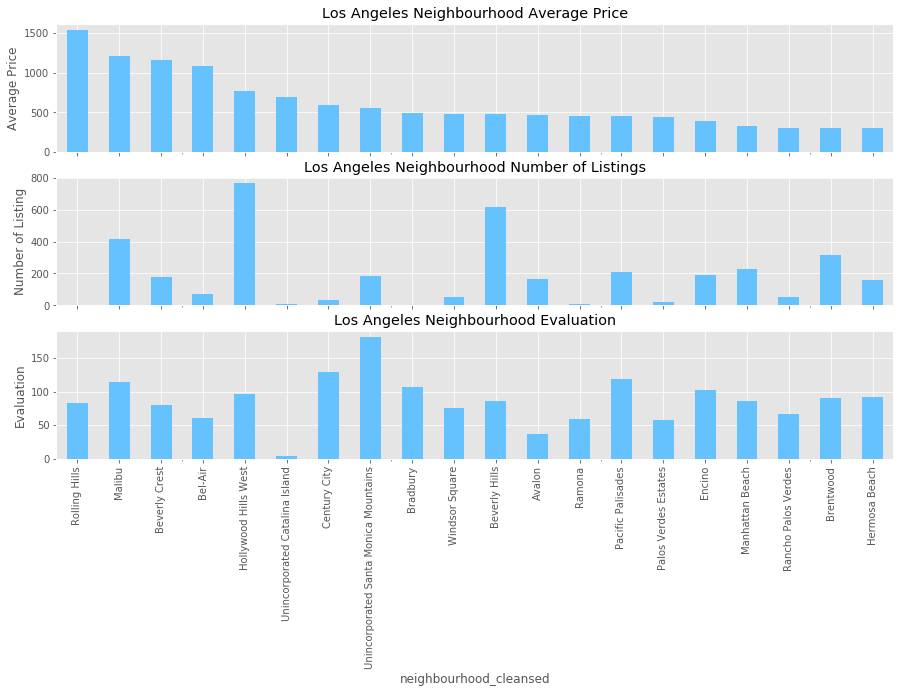

In [11]:
# Your code to answer Question 1
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')
df = pd.read_csv('data/listings.csv')
df.fillna(0, inplace = True)
df['E'] = df['review_scores_rating'].astype(float)\
          * df['reviews_per_month'].astype(float)
df['price'] = df.price.apply(lambda x: float(x.strip('$').replace(',','')))
df_neighbour_p = pd.DataFrame(df.groupby('neighbourhood_cleansed')[('price','E')].mean())
df_neighbour_p = df_neighbour_p.reset_index()
df_neighbour_p = df_neighbour_p.rename(columns = {'price':'Average Price','E':'Evaluation'})
df_neighbour_listing = pd.DataFrame(df.groupby('neighbourhood_cleansed').id.count())
df_neighbour_listing = df_neighbour_listing.reset_index()
df_neighbour_listing = df_neighbour_listing.rename(columns = {'id': 'N_of_Listing'})
df_p_listings = df_neighbour_p.merge(df_neighbour_listing, how = 'inner', on = 'neighbourhood_cleansed')
df_p_listings = df_p_listings.sort_values(['Average Price','Evaluation','N_of_Listing'], ascending = [0,0,0]).head(20)
fig,(ax0,ax1,ax2) = plt.subplots(nrows = 3, ncols = 1, figsize = (15,24),sharex = True)
df_p_listings.loc[:,('neighbourhood_cleansed','Average Price')].plot(kind = 'bar', x = 'neighbourhood_cleansed',\
                   y = 'Average Price', color = '#66c2ff', figsize = (15,8)\
                   , title = 'Los Angeles Neighbourhood Average Price',legend = False, ax = ax0,sharex =ax2)
ax0.set(ylabel = 'Average Price')
df_p_listings.loc[:,('neighbourhood_cleansed','N_of_Listing')].plot(kind = 'bar', x = 'neighbourhood_cleansed',\
                   y = 'N_of_Listing', color = '#66c2ff', figsize = (15,8)\
                   , title = 'Los Angeles Neighbourhood Number of Listings',legend = False,ax = ax1,sharex =ax2)
ax1.set(ylabel = 'Number of Listing')
df_p_listings.loc[:,('neighbourhood_cleansed','Evaluation')].plot(kind = 'bar', x = 'neighbourhood_cleansed',\
                   y = 'Evaluation', color = '#66c2ff', figsize = (15,8)\
                   , title = 'Los Angeles Neighbourhood Evaluation',legend = False,ax = ax2)
ax2.set(ylabel = 'Evaluation')
df_area = df.loc[(df['neighbourhood'] == 'Unincorporated Santa Monica Mountains')|(df['neighbourhood'] == 'Malibu')\
                 |(df['neighbourhood'] == 'Beverly Hills'),:]

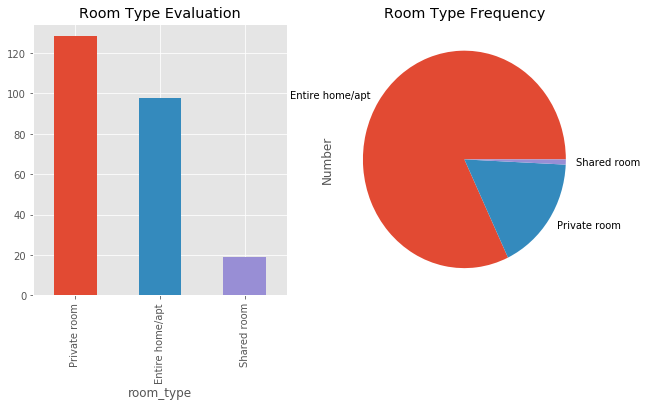

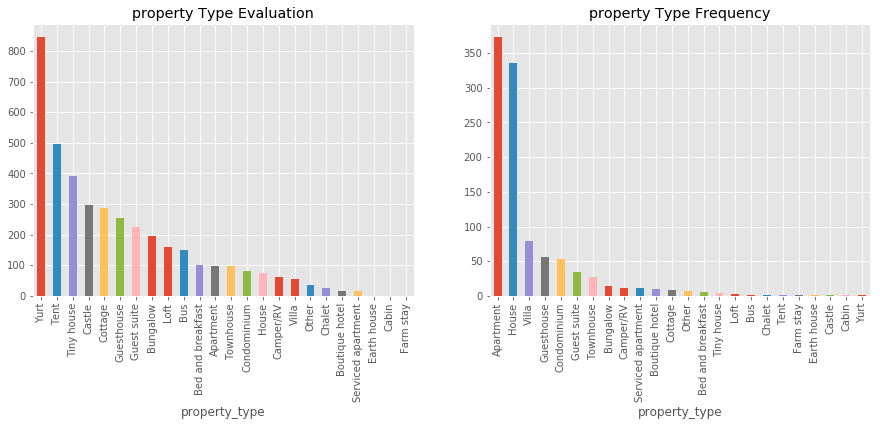

In [12]:
# Your code to answer Question 2
df_room = df_area.loc[:,('id','room_type','E')]
df_room_type1 = pd.DataFrame(df_room.groupby('room_type').E.mean())
df_room_type1 = df_room_type1.rename(columns = {'E':'Evaluation'})
df_room_type1 = df_room_type1.reset_index()
df_room_type1 = df_room_type1.sort_values('Evaluation', ascending = False)
df_room_type2 = pd.DataFrame(df_room.groupby('room_type').id.count())
df_room_type2 = df_room_type2.rename(columns = {'id':'Number'})
df_room_type2 = df_room_type2.sort_values('Number', ascending = False)
fig,(ax0,ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))
df_room_type1.plot(kind = 'bar',x = 'room_type',y = 'Evaluation'\
                  ,figsize = (10,5),title = 'Room Type Evaluation',legend = False,ax = ax0)
df_room_type2.plot(kind = 'pie',y = 'Number'\
                  ,figsize = (10,5),title = 'Room Type Frequency',legend = False,ax = ax1)
df_property = df_area.loc[:,('id','property_type','E')]
df_property_type1 = pd.DataFrame(df_property.groupby('property_type').E.mean())
df_property_type1 = df_property_type1.rename(columns = {'E':'Evaluation'})
df_property_type1 = df_property_type1.reset_index()
df_property_type1 = df_property_type1.sort_values('Evaluation', ascending = False)
df_property_type2 = pd.DataFrame(df_property.groupby('property_type').id.count())
df_property_type2 = df_property_type2.rename(columns = {'id':'Number'})
df_property_type2 = df_property_type2.reset_index()
df_property_type2 = df_property_type2.sort_values('Number', ascending = False)
fig,(ax0,ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (30,5))
df_property_type1.plot(kind = 'bar',x = 'property_type',y = 'Evaluation'\
                  ,figsize = (15,5),title = 'property Type Evaluation',legend = False,ax = ax0)
df_property_type2.plot(kind = 'bar',x = 'property_type',y = 'Number'\
                  ,figsize = (15,5),title = 'property Type Frequency',legend = False,ax = ax1)

[Text(0.5,1,'Top15 Average Potential Earnings of Amenities')]

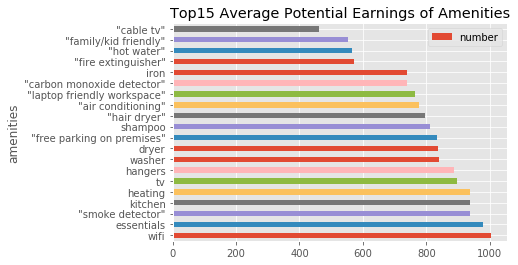

In [13]:
# Your code to answer Question 3
amenities_counts = {}
for index, row in df_area.iterrows():
    amenities = row['amenities']
    amenities = str(amenities).strip("{").strip("}")
    word_tokens = amenities.split(",")  
    for w in word_tokens:
        w = w.lower()
        if w in amenities_counts.keys():
            amenities_counts[w] += 1
        else:
            amenities_counts[w] = 1
amenities_DF = pd.DataFrame.from_dict(amenities_counts, orient='index')
amenities_DF.reset_index(drop=False,inplace=True)
amenities_DF.rename(columns={"index":"amenities",0:"number"},inplace=True)
amenities_DF = amenities_DF.sort_values(by='number', ascending=False).head(20)
fig,ax=plt.subplots()
amenities_DF.plot(kind="barh",x="amenities",y="number",ax=ax)
ax.set(title = "Top15 Average Potential Earnings of Amenities")

dict_keys(['hills', 'beverly', 'malibu', 'guesthouse', 'house', 'guest', 'charming', 'cottage', 'private', 'cozy'])
225.61160803964265


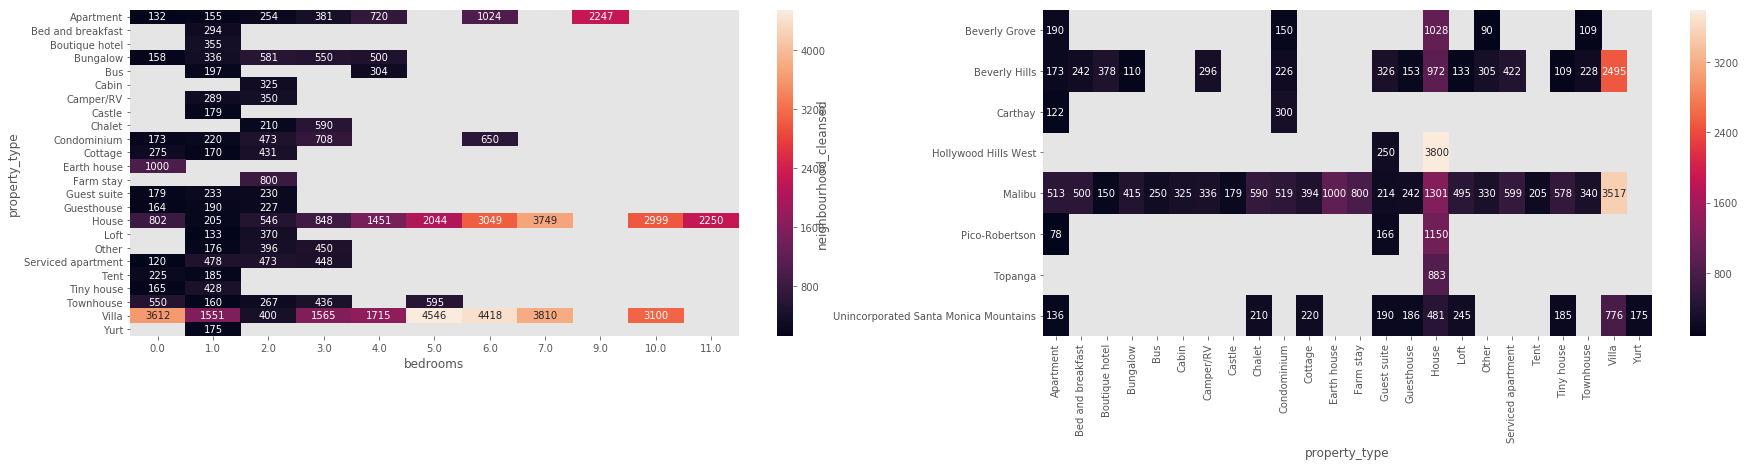

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

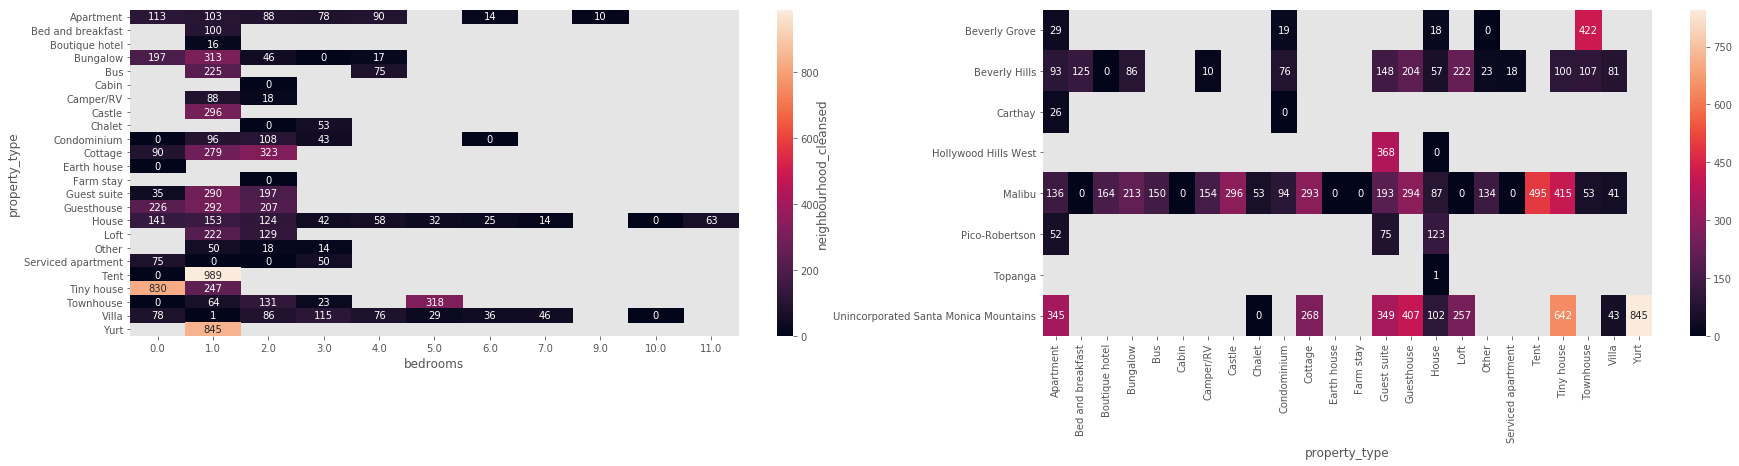

<Figure size 1080x432 with 0 Axes>

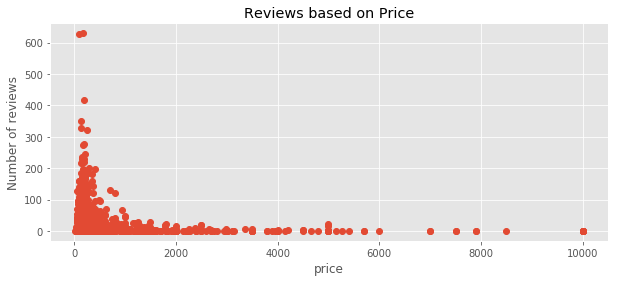

In [16]:
# Your code to answer Question 4
from string import punctuation
from nltk.tokenize import word_tokenize

fig,(ax0,ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (30,6))
plt.figure(figsize = (15,6))
sns.heatmap(df_area.groupby(['property_type','bedrooms']).price.mean().unstack(),annot = True, fmt = ".0f",ax = ax0)
plt.figure(figsize = (15,6))
sns.heatmap(df_area.groupby(['neighbourhood_cleansed','property_type']).price.mean().unstack(),annot = True, fmt = ".0f",ax = ax1)
price_review =df_area[['number_of_reviews', 'price']].sort_values(by = 'price')
fig,(ax0,ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (30,6))
sns.heatmap(df_area.groupby(['property_type','bedrooms']).E.mean().unstack(),annot = True, fmt = ".0f",ax = ax0)
plt.figure(figsize = (15,6))
sns.heatmap(df_area.groupby(['neighbourhood_cleansed','property_type']).E.mean().unstack(),annot = True, fmt = ".0f",ax = ax1)
price_review =df_area[['number_of_reviews', 'price']].sort_values(by = 'price')
price_review.plot(x = 'price', 
                  y = 'number_of_reviews', 
                  style = 'o',
                  figsize =(10,4),
                  legend = False,
                  title = 'Reviews based on Price')
plt.xlabel("price")
plt.ylabel("Number of reviews")

df_select1 = df_area.loc[(df_area['property_type'] == 'Guesthouse')&((df_area['bedrooms'] == 1)|(df_area['bedrooms'] == 2))]
df_select = df_select1.loc[df_select1['room_type' ] == 'Entire home/apt',:]
dfc0 = dfc.loc[dfc['available'] == 't',('price','listing_id','date')]
dfc0['price']=dfc0['price'].apply(lambda x: float(x.strip('$').replace(",","")))
df_select = df_select.merge(dfc0, how = 'inner', left_on = 'id', right_on = 'listing_id')
name = {}
def strip_punctuation(s):
        return ''.join(c for c in s if c not in punctuation)

def strip_numbers(s):
        numbers = ['0','1','2','3','4','5','6','7','8','9']
        return ''.join(c for c in s if c not in numbers)
for n in df_select['name']:
        n =str(n)
        n = strip_punctuation(n)
        n = strip_numbers(n)
        n = n.replace("’","")
        word_tokens1 = word_tokenize(n)     
        for w in word_tokens1:
            w = w.lower()
            if w not in stop_words:
                if w in name.keys():
                    name[w] += 1
                else:
                    name[w] = 1

        top_ten_value1 = sorted(name.values(),reverse=True)[0:10]
        top_ten_name = {}
        for value in top_ten_value1:
            for key in name.keys():
                if name[key] == value:
                    top_ten_name[key] = value
print(top_ten_name.keys())
df_select_price = df_select.groupby('id').price_y.mean()
airbnb_price = df_select_price.mean()
print(airbnb_price)

In [17]:
# Your code to answer Question 5
estimated_price = 2000000
yearly_available = df_select.availability_365.mean()
yearly_return = yearly_available*airbnb_price 
print('The average annual return of this investment is ', yearly_return)
time_to_profit = estimated_price/yearly_return
print(time_to_profit,'year is the estimated time that the investment can begin to profit.')

The average annual return of this investment is  62473.3470770667
32.01365211844362 year is the estimated time that the investment can begin to profit.


## Executive Summary
The task in front of us is to provide consulting strategy for a client who want to invest in real estate of Airbnb. To provide a convincing solution. We break the task into 5 steps. And for each step, we provide a graph to realize data visualization.

In step 1,  we target at the most ideal place to invest.As we can tell from the graph1, Unicorporated Santa Monica Mountains, Malibus, and Beverly Hills occupie the greatest potential values since they have relatively high average price with great evaluation which is calculated by review per month and rating scores.Meanhile, this place have sufficient number of listing to make sure the average price is accurate enough.


In step 2,we tried to figure out which type of room and which type of property have the greatest potential income. The calculation formula is: total potential income of each room type = sum of (unit price * reviews per unit) for each room-type. We found that "Entire home/apt" occupied the most potential market. The calculation of the choice of property type is similar to the calculation of room type. And we found that guesthouse property type occupies the greatest potential values because it has relatively high evaluation and number of listing based on graph 2 we get.

In step 3, based on the room type, property type and area we found that have the most potential values. We tried to figure out what are the most common amenities in these properties. The conclusion is: the property should be equiped with wifi,essentials, kitchen, smoke detector, heating, hangers, tv, washer, dryer, shampoo, air conditioning, carbon monoxide detector, hair dryer, laptop friendly workspace, iron, hot water, fire extinguisher, first aid kit. Also, the property should be family/kid friendly. 

In step 4, we tried to set a proper price for the property that we intend to invest. And the price is set to be about 225 per day per room. Using a heatmap to explore the average price with great evaluation, we can discover that the guesthouse still performance wells and the price range from $164 to $240, which is reasonable and affordable for tenants and ,at the same time, gets the most reviews on Airbnb. Summarizing all the information we get from the research, we believe $225 is a reasonable price by offering basic amenities. 

Finally, we tried to estimate the annual return of such an investment under the price we set which is $2,000,000. It turned out to be $62473.5 profit per year. And from the 32th year, the property is the estimated time to begin to generate profit.

In a nutshell, we do not recomment the client to invest on real estate of LA by leasing it on Airbnb!